# Distribuciones en forma de anillo

In [5]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

%matplotlib inline

#Para generar una distribución con forma de anillo 
#generamos dos distribuciones uniformes para los angulos y las distancias
#para cada par de angulo-distancia calculamos en que coordenada está
def ring(r_min=0, r_max=1, n_samples=360):
    angle = rnd.uniform(0, 2*np.pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*np.cos(a), d*np.sin(a)])
    return np.array(data)

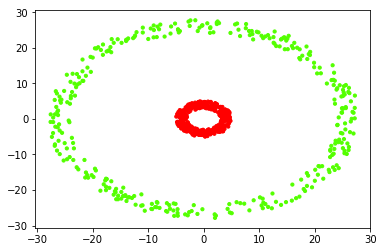

In [6]:
data1 = ring(3, 5)
data2 = ring(24, 28)

data = np.concatenate([data1, data2], axis=0)

#Creamos etiquetas que los identifiquen como de diferentes datasets
labels = np.concatenate([[0 for i in range(len(data1))], [1 for i in range(len(data2))]])

plt.scatter(data[:,0], data[:,1], c = labels, cmap = "prism", s = 10)

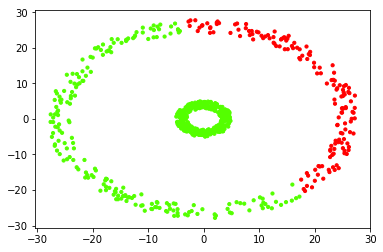

In [7]:
#Intentamos separarlos con k-means
from sklearn.cluster import KMeans

model = KMeans(2).fit(data)
pred = model.predict(data)

plt.scatter(data[:,0], data[:,1], c = pred, cmap = "prism", s = 10)
#Esta división no es la esperada, k-means no puede separar clusters con forma de anillos concentricos

# K-medoids

Lo que hace es buscar el punto de cada cluster que esté más en medio en vez de que el centroide sea un punto fuera del dataset.

In [12]:
from pyclust import KMedoids

model = KMedoids(2).fit_predict(data)
model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

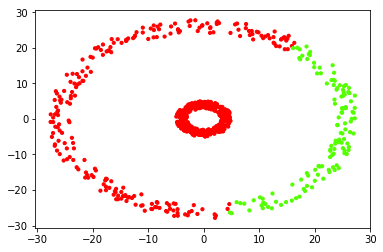

In [13]:
plt.scatter(data[:,0], data[:,1], c = model, cmap = "prism", s = 10)

# Clustering espectral

Hace una transformacion para generar los valores y vectores propios de cada dato.<br>
Transforma los datos usando el kernel gaussiano y construye una matriz laplaciana.

In [23]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(2).fit_predict(data)

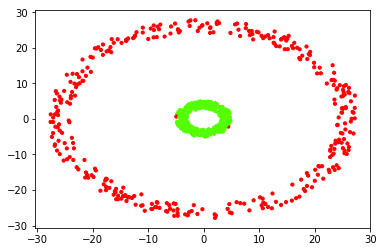

In [24]:
plt.scatter(data[:,0], data[:,1], c = model, cmap = "prism", s = 10)